In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
import sklearn
print(sklearn.__version__)

1.3.1


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler

# read & load the dataset into pandas dataframe

In [4]:
df_nutri = pd.read_csv(r"C:\Users\User\Downloads\nutrition.csv")

In [5]:
# printing the columns

for i in df_nutri.columns:
    print(i , end=",")

Unnamed: 0,name,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,niacin,pantothenic_acid,riboflavin,thiamin,vitamin_a,vitamin_a_rae,carotene_alpha,carotene_beta,cryptoxanthin_beta,lutein_zeaxanthin,lucopene,vitamin_b12,vitamin_b6,vitamin_c,vitamin_d,vitamin_e,tocopherol_alpha,vitamin_k,calcium,copper,irom,magnesium,manganese,phosphorous,potassium,selenium,zink,protein,alanine,arginine,aspartic_acid,cystine,glutamic_acid,glycine,histidine,hydroxyproline,isoleucine,leucine,lysine,methionine,phenylalanine,proline,serine,threonine,tryptophan,tyrosine,valine,carbohydrate,fiber,sugars,fructose,galactose,glucose,lactose,maltose,sucrose,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water,

In [6]:
df_nutri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8789 entries, 0 to 8788
Data columns (total 77 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Unnamed: 0                   8789 non-null   int64 
 1   name                         8789 non-null   object
 2   serving_size                 8789 non-null   object
 3   calories                     8789 non-null   int64 
 4   total_fat                    8789 non-null   object
 5   saturated_fat                7199 non-null   object
 6   cholesterol                  8789 non-null   object
 7   sodium                       8789 non-null   object
 8   choline                      8789 non-null   object
 9   folate                       8789 non-null   object
 10  folic_acid                   8789 non-null   object
 11  niacin                       8789 non-null   object
 12  pantothenic_acid             8789 non-null   object
 13  riboflavin                   8789

In [7]:
df_nutri.columns

Index(['Unnamed: 0', 'name', 'serving_size', 'calories', 'total_fat',
       'saturated_fat', 'cholesterol', 'sodium', 'choline', 'folate',
       'folic_acid', 'niacin', 'pantothenic_acid', 'riboflavin', 'thiamin',
       'vitamin_a', 'vitamin_a_rae', 'carotene_alpha', 'carotene_beta',
       'cryptoxanthin_beta', 'lutein_zeaxanthin', 'lucopene', 'vitamin_b12',
       'vitamin_b6', 'vitamin_c', 'vitamin_d', 'vitamin_e', 'tocopherol_alpha',
       'vitamin_k', 'calcium', 'copper', 'irom', 'magnesium', 'manganese',
       'phosphorous', 'potassium', 'selenium', 'zink', 'protein', 'alanine',
       'arginine', 'aspartic_acid', 'cystine', 'glutamic_acid', 'glycine',
       'histidine', 'hydroxyproline', 'isoleucine', 'leucine', 'lysine',
       'methionine', 'phenylalanine', 'proline', 'serine', 'threonine',
       'tryptophan', 'tyrosine', 'valine', 'carbohydrate', 'fiber', 'sugars',
       'fructose', 'galactose', 'glucose', 'lactose', 'maltose', 'sucrose',
       'fat', 'saturated_fatt

In [8]:
#  Drop the columns by drop method
#df_nutri.drop(columns=['col1', 'col2', 'col4'], inplace=True)

# Or you  make a new data frame and add then select columns inside it.

df_nutri = df_nutri[[
    # food
    'name',
    'serving_size',
    'calories',
    # vitamins
     'vitamin_a','vitamin_b12',
       'vitamin_b6', 'vitamin_c', 'vitamin_d', 'vitamin_k', 'vitamin_e','carotene_beta','thiamin',

    # Protein & minerals
     'copper', 'irom', 'magnesium',
       'phosphorous', 'potassium', 'zink', 'protein','calcium',
    # carbs , fats & sugars
    'carbohydrate', 'fiber', 'sugars',
       'fat','total_fat','cholesterol','sodium',
    # water
    'water']].copy()

In [9]:
# split the columns
#df_nutri[["Food","Type"]] = df_nutri["name"].str.split(",", n =1, expand=True,)

# drop the original Name columns
#df_nutri = df_nutri.drop("name",axis=1)

# reindexing the columns 
#df_nutri = df_nutri.reindex(columns=['Food', 'Type'] + list(df_nutri.columns[:-2]))

In [10]:
df_nutri.columns[df_nutri.isna().any()]

Index([], dtype='object')

In [11]:
df_nutri.tail(1)

,name,serving_size,calories,vitamin_a,vitamin_b12,vitamin_b6,vitamin_c,vitamin_d,vitamin_k,vitamin_e,...,protein,calcium,carbohydrate,fiber,sugars,fat,total_fat,cholesterol,sodium,water
8788,"Beef, raw, all grades, trimmed to 0"" fat, sepa...",100 g,121,6.00 IU,1.84 mcg,0.644 mg,0.0 mg,1.00 IU,1.5 mcg,0.24 mg,...,23.37 g,13.00 mg,0.00 g,0.0 g,0.00 g,3.04 g,3g,60mg,53.00 mg,73.43 g


In [12]:
df_nutri['name'] = df_nutri['name'].str.replace(',', '\n')

In [13]:
df_nutri.rename(columns={"name":"Food","serving_size":"Svg_size_g",'total_fat':'Ttl_fat_g','cholesterol':'Chol_mg',"sodium":"Na_mg",'thiamin':'B1_mg','vitamin_a':'Vit_a_iu',"carotene_beta":'B_carotene_mcg',"vitamin_b12":'Vit_b12_mcg',
                   'vitamin_b6': 'Vit_b6_mg','vitamin_c':'Vit_c_mg','vitamin_d':'Vit_d_iu','vitamin_e':'Vit_e_mg','vitamin_k':'Vit_k_mcg','calcium':'Ca_mg','copper':'Cu_mg',
                   'irom':'Fe_mg','magnesium':'Mg_mg','phosphorous':'P_mg',"potassium":"K_mg","zink":'Zn_mg','protein':'Protein_g','carbohydrate':'Carbs_g','fiber':'Fiber_g','sugars':'Sugars_g','fat':'Fat_g', 'water':'H2O_g'}, inplace = True)

### Abbreviations Used in this Project
Column name	Description
Food	Name of the Food
Svg_size_g	Serving Size Gram
Ttlfat	Total Fat
Vitamin_k   Vit_k_mg (mcg)
Vit_e_mg	Vitamin E (mg)
Vit_D_IU	Vitamin D (IU)
Chol_(mg)	Cholesterol (mg)
Vit_b6_mg	Vitamin B6 is a water-soluble vitamin that is part of the B-vitamin family.
Vit_b12_mcg	Vitamin B12 is a water-soluble vitamin that is part of the B-vitamin family.
Vit_a_iu	Vitamin A is a fat-soluble vitamin that is part of the vitamin A family.
B_carotene_mcg	Beta carotene is a fat-soluble vitamin that is part of the vitamin A family.
Fe_mg	Iron
Mg_mg	Magnesium
P_mg	Phosphorous
K_mg	Potassium
zn_mg	Zinc
Protein_g	Protein
Carbs_g	Carbohydrate
Fiber_g	Fiber
Sugars_g	Sugars
Fat_g	Fat
H2O    Water(g)

In [14]:
df_nutri.rename(columns={"name":"Food","serving_size":"Svg_size_g",'total_fat':'Ttl_fat_g','cholesterol':'Chol_mg',"sodium":"Na_mg",'thiamin':'B1_mg','vitamin_a':'Vit_a_iu',"carotene_beta":'B_carotene_mcg',"vitamin_b12":'Vit_b12_mcg',
                   'vitamin_b6': 'Vit_b6_mg','vitamin_c':'Vit_c_mg','vitamin_d':'Vit_d_iu','vitamin_e':'Vit_e_mcg','vitamin_k':'Vit_k_mg','calcium':'Ca_mg','copper':'Cu_mg',
                   'irom':'Fe_mg','magnesium':'Mg_mg','phosphorous':'P_mg',"potassium":"K_mg","zink":'Zn_mg','protein':'Protein_g','carbohydrate':'Carbs_g','fiber':'Fiber_g','sugars':'Sugars_g','fat':'Fat_g', 'water':'H2O_g'}, inplace = True)

In [15]:
df_nutri.dtypes

Food              object
Svg_size_g        object
calories           int64
Vit_a_iu          object
Vit_b12_mcg       object
Vit_b6_mg         object
Vit_c_mg          object
Vit_d_iu          object
Vit_k_mcg         object
Vit_e_mg          object
B_carotene_mcg    object
B1_mg             object
Cu_mg             object
Fe_mg             object
Mg_mg             object
P_mg              object
K_mg              object
Zn_mg             object
Protein_g         object
Ca_mg             object
Carbs_g           object
Fiber_g           object
Sugars_g          object
Fat_g             object
Ttl_fat_g         object
Chol_mg           object
Na_mg             object
H2O_g             object
dtype: object

In [16]:
# dealing with miniscule amounts
cols_to_clean = list(df_nutri.columns[1:])
df_nutri[cols_to_clean] = df_nutri[cols_to_clean].replace({"mg": "", "g": "","mc":"","IU":""}, regex=True).astype(float)

In [17]:
df_nutri.describe()

,Svg_size_g,calories,Vit_a_iu,Vit_b12_mcg,Vit_b6_mg,Vit_c_mg,Vit_d_iu,Vit_k_mcg,Vit_e_mg,B_carotene_mcg,...,Protein_g,Ca_mg,Carbs_g,Fiber_g,Sugars_g,Fat_g,Ttl_fat_g,Chol_mg,Na_mg,H2O_g
count,8789.0,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,...,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000
mean,100.0,226.283878,676.320514,1.201716,0.261324,8.356548,14.560815,9.296268,0.885576,141.716236,...,11.345616,73.317328,22.121915,2.040073,6.756293,10.550794,10.556855,38.723063,306.353851,54.112074
std,0.0,169.862001,3694.739553,4.271908,0.467713,65.624854,123.643892,62.128752,3.813260,1030.755350,...,10.530602,199.850425,27.266261,4.269181,13.718890,15.814870,15.818247,117.358944,939.220468,30.772999
min,100.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,100.0,91.000000,0.000000,0.000000,0.035000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.380000,8.000000,0.050000,0.000000,0.000000,0.950000,1.000000,0.000000,36.000000,29.700000
50%,100.0,191.000000,20.000000,0.070000,0.119000,0.000000,0.000000,0.000000,0.120000,0.000000,...,8.020000,19.000000,9.340000,0.400000,0.490000,5.130000,5.100000,2.000000,84.000000,63.080000
75%,100.0,337.000000,208.000000,1.270000,0.357000,2.400000,1.000000,1.900000,0.460000,2.000000,...,19.880000,63.000000,34.910000,2.400000,6.050000,13.720000,14.000000,65.000000,396.000000,77.960000
max,100.0,902.000000,100000.000000,98.890000,12.000000,2732.000000,10000.000000,1714.500000,149.400000,42891.000000,...,88.320000,7364.000000,100.000000,79.000000,99.800000,100.000000,100.000000,3100.000000,38758.000000,100.000000


In [18]:
df_nutri.columns[df_nutri.isna().any()]

Index([], dtype='object')

In [19]:
df_nutri.duplicated(subset=["Food"]).sum() 

0

In [20]:
df_nutri.head()

,Food,Svg_size_g,calories,Vit_a_iu,Vit_b12_mcg,Vit_b6_mg,Vit_c_mg,Vit_d_iu,Vit_k_mcg,Vit_e_mg,...,Protein_g,Ca_mg,Carbs_g,Fiber_g,Sugars_g,Fat_g,Ttl_fat_g,Chol_mg,Na_mg,H2O_g
0,Cornstarch,100.0,381.0,0.0,0.00,0.000,0.0,0.0,0.0,0.00,...,0.26,2.0,91.27,0.9,0.00,0.05,0.1,0.0,9.0,8.32
1,Nuts\n pecans,100.0,691.0,56.0,0.00,0.210,1.1,0.0,3.5,1.40,...,9.17,70.0,13.86,9.6,3.97,71.97,72.0,0.0,0.0,3.52
2,Eggplant\n raw,100.0,25.0,23.0,0.00,0.084,2.2,0.0,3.5,0.30,...,0.98,9.0,5.88,3.0,3.53,0.18,0.2,0.0,2.0,92.30
3,Teff\n uncooked,100.0,367.0,9.0,0.00,0.482,0.0,0.0,1.9,0.08,...,13.30,180.0,73.13,8.0,1.84,2.38,2.4,0.0,12.0,8.82
4,Sherbet\n orange,100.0,144.0,46.0,0.13,0.023,2.3,0.0,0.0,0.01,...,1.10,54.0,30.40,1.3,24.32,2.00,2.0,1.0,46.0,66.10


In [21]:
# create a dictionary of food categories and their corresponding keywords
categories = {
    'Vegetables': ['broccoli', 'spinach', 'kale', 'carrots', 'tomatoes', 'bell peppers', 'cucumbers', 'zucchini', 'eggplant', 'cauliflower', 'cabbage', 'onions', 'sweet potatoes', 'green beans', 'peas', 'asparagus', 'Brussels sprouts', 'artichokes', 'beets', 'radishes'],
    'Meat': ['beef', 'pork', 'lamb', 'goat', 'chicken', 'turkey', 'duck','goose', 'rabbit', 'bison'],
    'Poultry': ['chicken', 'turkey', 'duck', 'quail', 'goose', 'pigeon', 'pheasant'],
    'Fat food': ['butter', 'cheese', 'lard', 'margarine', 'shortening'],
    'Dairy Products': ['milk', 'yogurt', 'cheese', 'cream', 'butter', 'ice cream', 'sour cream', 'cottage cheese'],
    'Drinks': ['water', 'coffee', 'tea', 'soda', 'juice', 'beer', 'wine', 'liquor'],
    'Dessert Sweets': ['cake', 'pie', 'chocolate', 'candy', 'cookies', 'ice cream'],
    'Seeds and Nuts': ['almonds', 'cashews', 'peanuts', 'pistachios', 'walnuts', 'sesame seeds', 'flax seeds', 'chia seeds']
}

# create a dictionary of food categories 

df_nutri['Category'] = ''

# iterate through each food category and assign the corresponding category to the food items
for category, keywords in categories.items():
    df_nutri.loc[df_nutri['Food'].str.contains('|'.join(keywords), case=False), 'Category'] = category

In [22]:
df_nutri

,Food,Svg_size_g,calories,Vit_a_iu,Vit_b12_mcg,Vit_b6_mg,Vit_c_mg,Vit_d_iu,Vit_k_mcg,Vit_e_mg,...,Ca_mg,Carbs_g,Fiber_g,Sugars_g,Fat_g,Ttl_fat_g,Chol_mg,Na_mg,H2O_g,Category
0,Cornstarch,100.0,381.0,0.0,0.00,0.000,0.0,0.0,0.0,0.00,...,2.0,91.27,0.9,0.00,0.05,0.1,0.0,9.0,8.32,
1,Nuts\n pecans,100.0,691.0,56.0,0.00,0.210,1.1,0.0,3.5,1.40,...,70.0,13.86,9.6,3.97,71.97,72.0,0.0,0.0,3.52,
2,Eggplant\n raw,100.0,25.0,23.0,0.00,0.084,2.2,0.0,3.5,0.30,...,9.0,5.88,3.0,3.53,0.18,0.2,0.0,2.0,92.30,Vegetables
3,Teff\n uncooked,100.0,367.0,9.0,0.00,0.482,0.0,0.0,1.9,0.08,...,180.0,73.13,8.0,1.84,2.38,2.4,0.0,12.0,8.82,
4,Sherbet\n orange,100.0,144.0,46.0,0.13,0.023,2.3,0.0,0.0,0.01,...,54.0,30.40,1.3,24.32,2.00,2.0,1.0,46.0,66.10,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8784,"Beef\n raw\n all grades\n trimmed to 0"" fat\n ...",100.0,125.0,11.0,1.64,0.631,0.0,1.0,1.5,0.23,...,13.0,0.00,0.0,0.00,3.50,3.5,62.0,54.0,72.51,Meat
8785,Lamb\n cooked\n separable lean only\n composit...,100.0,206.0,0.0,2.95,0.140,0.0,0.0,0.0,0.19,...,13.0,0.00,0.0,0.00,8.86,8.9,109.0,50.0,59.95,Meat
8786,Lamb\n raw\n separable lean and fat\n composit...,100.0,277.0,0.0,2.42,0.110,0.0,0.0,0.0,0.21,...,13.0,0.00,0.0,0.00,22.74,23.0,78.0,39.0,59.80,Meat
8787,"Beef\n raw\n all grades\n trimmed to 0"" fat\n ...",100.0,121.0,4.0,1.84,0.644,0.0,1.0,1.5,0.24,...,13.0,0.00,0.0,0.00,3.04,3.0,60.0,53.0,73.43,Meat


In [23]:
# Now delete the remaining rows which are not in the categories.
df_nutri['Category'].replace('', np.nan, inplace=True)

df_nutri.dropna(subset=["Category"], inplace = True)
df_nutri.reset_index(drop=True , inplace = True)

In [24]:
Nutri_dt_new = df_nutri["Category"].value_counts()
print(Nutri_dt_new)

Category
Meat              1336
Drinks            1023
Dairy Products     774
Poultry            659
Dessert Sweets     659
Vegetables         254
Fat food            70
Seeds and Nuts      56
Name: count, dtype: int64


In [25]:
# Dictionary mapping mood to recommended food categories
mood_weight = {
    1: ['Dessert Sweets', 'Fat food', 'Drinks'],  # For Sad mood
    2: ['Vegetables', 'Seeds and Nuts', 'Drinks'],  # For In-between mood
    3: ['Meat', 'Dairy Products', 'Drinks']  # For Happy mood
}

# Create a new column to store the mood weight for each food item
df_nutri['Mood_Weight'] = ''

# Function to assign mood weight based on food category
def assign_mood_weight(food_category):
    if food_category in mood_weight[1]:
        return 1  # Mood weight for Sad mood
    elif food_category in mood_weight[2]:
        return 2  # Mood weight for In-between mood
    elif food_category in mood_weight[3]:
        return 3  # Mood weight for Happy mood
    else:
        return 2  # Default weight for neutral or other food category

# Apply the function to create the new column 'Mood_Weight'
df_nutri['Mood_Weight'] = df_nutri['Category'].apply(assign_mood_weight)

# Display the updated DataFrame
print(df_nutri.head())

                      Food  Svg_size_g  calories  Vit_a_iu  Vit_b12_mcg  \
0           Eggplant\n raw       100.0      25.0      23.0         0.00   
1        Cauliflower\n raw       100.0      25.0       0.0         0.00   
2      Lamb\n raw\n ground       100.0     282.0       0.0         2.31   
3       Cheese\n camembert       100.0     300.0     820.0         1.30   
4  Chicken\n boiled\n feet       100.0     215.0     100.0         0.47   

   Vit_b6_mg  Vit_c_mg  Vit_d_iu  Vit_k_mcg  Vit_e_mg  ...  Carbs_g  Fiber_g  \
0      0.084       2.2       0.0        3.5      0.30  ...     5.88      3.0   
1      0.184      48.2       0.0       15.5      0.08  ...     4.97      2.0   
2      0.130       0.0       2.0        3.6      0.20  ...     0.00      0.0   
3      0.227       0.0      18.0        2.0      0.21  ...     0.46      0.0   
4      0.010       0.0       8.0        0.2      0.27  ...     0.20      0.0   

   Sugars_g  Fat_g  Ttl_fat_g  Chol_mg  Na_mg  H2O_g        Category

In [26]:
# Save the updated DataFrame to a new CSV file
df_nutri.to_csv('cleanedNutri.csv', index=False)

# display the updated dataframe
print(df_nutri)

                                                   Food  Svg_size_g  calories  \
0                                        Eggplant\n raw       100.0      25.0   
1                                     Cauliflower\n raw       100.0      25.0   
2                                   Lamb\n raw\n ground       100.0     282.0   
3                                    Cheese\n camembert       100.0     300.0   
4                               Chicken\n boiled\n feet       100.0     215.0   
...                                                 ...         ...       ...   
4826  Beef\n raw\n all grades\n trimmed to 0" fat\n ...       100.0     125.0   
4827  Lamb\n cooked\n separable lean only\n composit...       100.0     206.0   
4828  Lamb\n raw\n separable lean and fat\n composit...       100.0     277.0   
4829  Beef\n raw\n all grades\n trimmed to 0" fat\n ...       100.0     121.0   
4830  Beef\n raw\n all grades\n trimmed to 0" fat\n ...       100.0     121.0   

      Vit_a_iu  Vit_b12_mcg

### Exploratory Analysis and Visualization

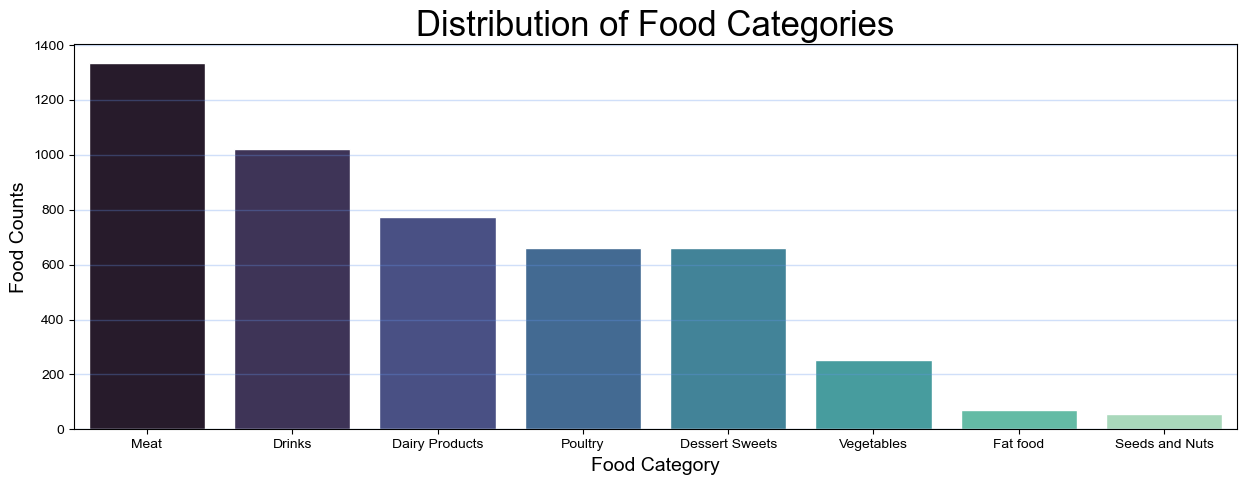

In [27]:
fig, ax = plt.subplots(figsize = (15,5), dpi = 100)
sns.set(style="whitegrid")
Category_count = df_nutri['Category'].value_counts()
ax = sns.barplot(x=Category_count.index,y=Category_count.values ,palette='mako');

# set x & y label
ax.set_ylabel('Food Counts', fontsize = 14)
ax.set_xlabel("Food Category", fontsize = 14)

# grid color
ax.grid(color='#6495ed', linewidth=1, axis='y', alpha=.3)

# set title
ax.set_title("Distribution of Food Categories", fontsize = 25)

plt.show()

This shows that majority of food items belong to the Meat category, followed by Drinks and alcohal and Dairy Products. The Dessert Sweets and Poultry categories also have a significant number of food items.

On the other hand, the Vegetables, Fat food, and Seeds and Nuts categories have a relatively small number of food items in the dataset.

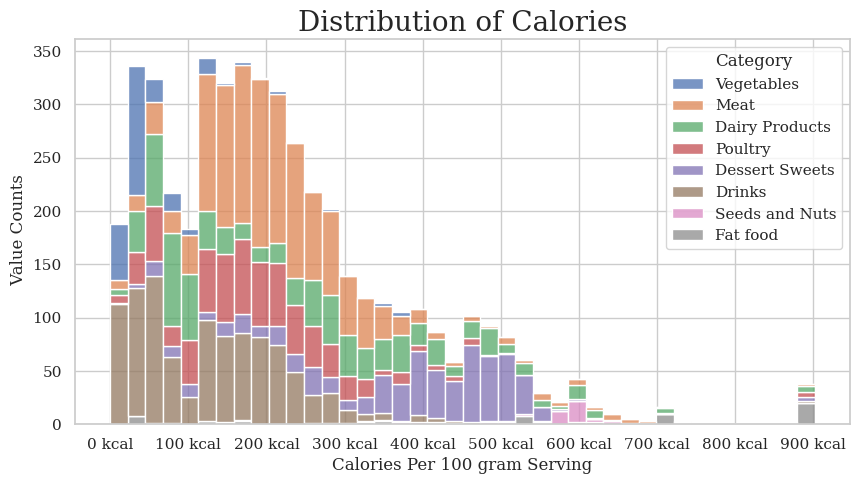

In [28]:
# create a new dataframe with only the necessary columns
Calories_df = df_nutri[['Category', 'calories']]

# create a histogram for each food category
plt.rc('font', family='serif', size=12)
fig, ax = plt.subplots(figsize = (10,5), dpi = 100)
ax = sns.histplot(data=df_nutri, x='calories', hue='Category', multiple='stack')

# set title & labels
ax.set_title("Distribution of Calories", fontsize = 20)
ax.set_xlabel("Calories Per 100 gram Serving")
ax.set_ylabel(" Value Counts")
ax.set_xticks(np.arange(0,1000,100))

# set x-tick labels to show "kcal"
x_ticks = plt.xticks()[0]
plt.xticks(x_ticks, [f"{int(x)} kcal" for x in x_ticks])

plt.show()

#### Insight

Based on the above Histograph plot of calorie values for each food category, some observation are :-

The majority of the Meat item fall in the range of 150 to 300 kcal per 100 g serving.
Poultry items are mostly in the range of 150-200 kcal per 100g serving with some outliers above 300 kcal.
Dairy Products have a wide range of calorie counts , with many items falling in the range.
Suprisingly desserts sweets are in the wide range 200 to 500 kcal per 100 gram serving.
Fat food items have a high range of calories value,with most numbers are falling above 500 or some are over 800 kcal per 100 gram servings.
Vegetables have a low range of calories values,with most item falling below 100 kcal .

Overall, it can be concluded that different food categories have varying ranges of calories values,with some category having a wide range some have a naroow range. It is important to be aware of the calorie content of foods when making dietary choices.

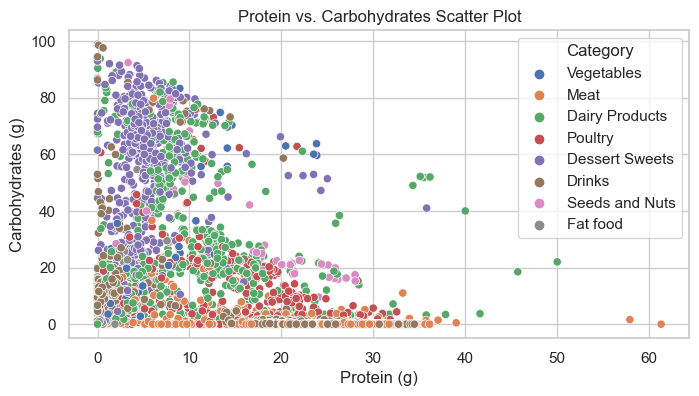

In [29]:
# create a scatter plot of protein vs. carbohydrates
plt.rc('font', family='sans-serif', size=12)
plt.subplots(figsize = (8,4), dpi = 100)
sns.scatterplot(x='Protein_g',hue = 'Category', y='Carbs_g', data=df_nutri)

# set the title and x and y axis labels

plt.title('Protein vs. Carbohydrates Scatter Plot')
plt.xlabel('Protein (g)')
plt.ylabel('Carbohydrates (g)')

#

# show the plot
plt.show()

## Insight

Based on the above scatter plot , we can see that

The meat category has a high concentration of protein and relatievely low carbs, with some outliers that have high carbs.
Vegetables has a wide range of carbs, with a maximum of aroung 40-80 g , and a relatievely low concentration.
The poultry category has a relatively low concentration of carbs,with most of the data points having below 40 and a high no of protein(g) per 100 gram serving
The drinks and alcohal category are most in the range of below 20 carbs and relatievely low concentration of Protein .But some drinks has protein obviously they are juices.
The dairy products category has a wide range of nutrient value , with some outliers having high protein and some having high carbs

Overall, scatetr plot shows that there is an wide range of nutrient value accross different food category.The meat category is high in protein , whereas as vegetables are high in carbs, and poultry is relatively low in carbs and high in protein.While the dairy category has a wide range of nutrient value

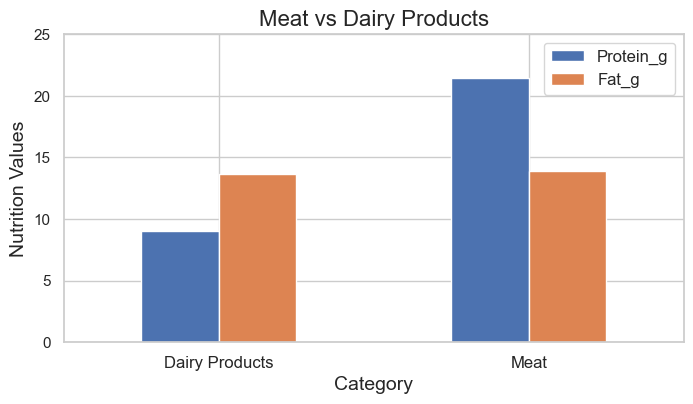

In [30]:
# filter the dataframe for Meat and Vegetables categories
meat_vegetables_df = df_nutri[df_nutri["Category"].isin(["Dairy Products", "Meat"])]

# group the filtered dataframe by Category and calculate mean values of calories, protein, and fat
grouped_df = meat_vegetables_df.groupby("Category")[["Protein_g", "Fat_g"]].mean()

grouped_df.plot(kind="bar", figsize=(8, 4))
plt.title("Meat vs Dairy Products", fontsize=16)
plt.yticks(np.arange(0,30,5))
plt.ylabel("Nutrition Values", fontsize=14)
plt.xlabel("Category", fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.legend(fontsize=12)
plt.show()

### Insight

Based on tha analysis of the Meat and dairy products categories.it can observed that meat are slightly higher protein compared to the dairy products .On the other hand , dairy products are slightly higher in fat compared to meat products

This suggest that individuall looking for high protein diet may prefer Meat products. While those looking to substitute protein with other food option can consider dairy products.

However, it is important dairy prducts are also high in fat content consider this data 100gram of per seving

individuals should be mindful of their overall nutrient intake and consider low-fat dairy options if necessary.

In [31]:
df_nutri.columns

Index(['Food', 'Svg_size_g', 'calories', 'Vit_a_iu', 'Vit_b12_mcg',
       'Vit_b6_mg', 'Vit_c_mg', 'Vit_d_iu', 'Vit_k_mcg', 'Vit_e_mg',
       'B_carotene_mcg', 'B1_mg', 'Cu_mg', 'Fe_mg', 'Mg_mg', 'P_mg', 'K_mg',
       'Zn_mg', 'Protein_g', 'Ca_mg', 'Carbs_g', 'Fiber_g', 'Sugars_g',
       'Fat_g', 'Ttl_fat_g', 'Chol_mg', 'Na_mg', 'H2O_g', 'Category',
       'Mood_Weight'],
      dtype='object')

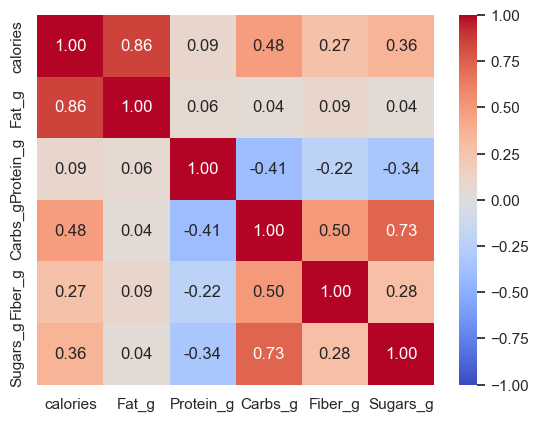

In [32]:
# create a correlation matrix of the nutrients
corr_matrix = df_nutri[['calories', 'Fat_g', 'Protein_g', 'Carbs_g', 'Fiber_g', 'Sugars_g']].corr()

# plot the correlation matrix as a heat map using seaborn
sns.heatmap(corr_matrix, annot=True, vmin=-1, vmax=1,center=0, cmap='coolwarm', fmt='.2f')

plt.show()

### Insight

The dark blue color in the correlation matrix indicates a high positive correlation between protein and carbs, meaning that as the protein intake increases, the carb intake also increase. This could be due to the fact that many high-protein foods such as meat, fish, and poultry also contain significant amounts of carbohydrates.

Similarly, there is a positive correlation between protein and fat, which could be due to the fact that many high-protein foods also contain significant amounts of fat, such as nuts, seeds, and fatty meats.

Finally, there is a positive correlation between fat and carbs, which could be due to the fact that many high-fat foods such as dairy products and nuts also contain significant amounts of carbohydrates.

### Ask and Answer Question
Q. what are the top categories from high to low protein?"

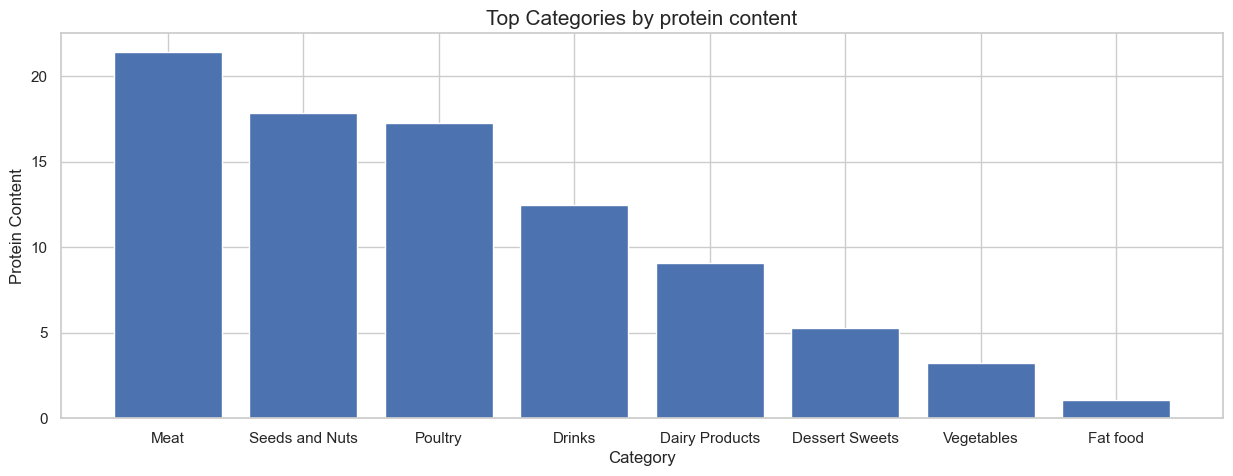

In [33]:
grouped_by = df_nutri.groupby("Category")["Protein_g"].mean()

sorted_series = grouped_by.sort_values(ascending=False)
plt.subplots(figsize = (15,5), dpi = 100)
plt.bar(sorted_series.index,sorted_series.values,)
plt.xlabel("Category")
plt.ylabel("Protein Content")
plt.title("Top Categories by protein content", size=15)

plt.show()

### Q: What are the top 5 food items with the highest protein content?

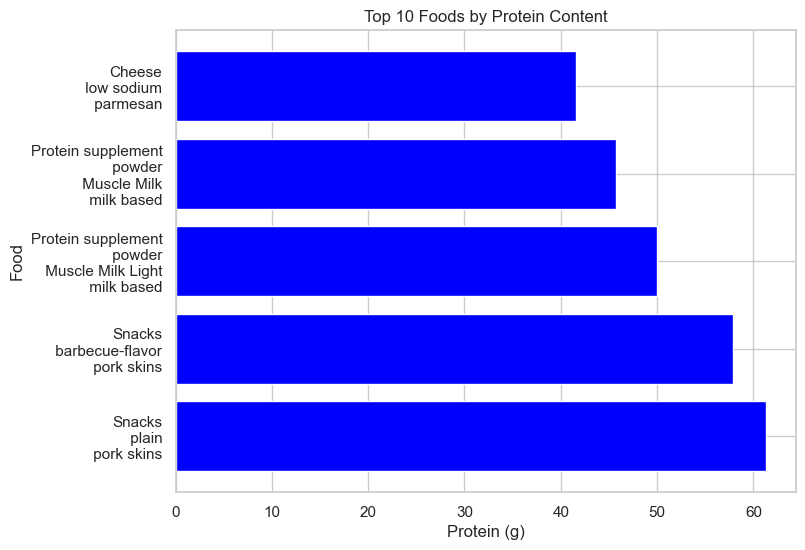

In [34]:
high_protein_df = df_nutri[df_nutri["Protein_g"] > 20]

top_5 = high_protein_df.sort_values("Protein_g",ascending=False).head(5)

fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(top_5['Food'], top_5['Protein_g'], color='blue')

# set the axis labels and title
plt.xlabel("Protein (g)")
plt.ylabel("Food")
plt.title("Top 10 Foods by Protein Content")

plt.show()


### Q Which food categories are the highest sources of zinc, iron, and magnesium?

In [35]:
df_nutri.columns

Index(['Food', 'Svg_size_g', 'calories', 'Vit_a_iu', 'Vit_b12_mcg',
       'Vit_b6_mg', 'Vit_c_mg', 'Vit_d_iu', 'Vit_k_mcg', 'Vit_e_mg',
       'B_carotene_mcg', 'B1_mg', 'Cu_mg', 'Fe_mg', 'Mg_mg', 'P_mg', 'K_mg',
       'Zn_mg', 'Protein_g', 'Ca_mg', 'Carbs_g', 'Fiber_g', 'Sugars_g',
       'Fat_g', 'Ttl_fat_g', 'Chol_mg', 'Na_mg', 'H2O_g', 'Category',
       'Mood_Weight'],
      dtype='object')

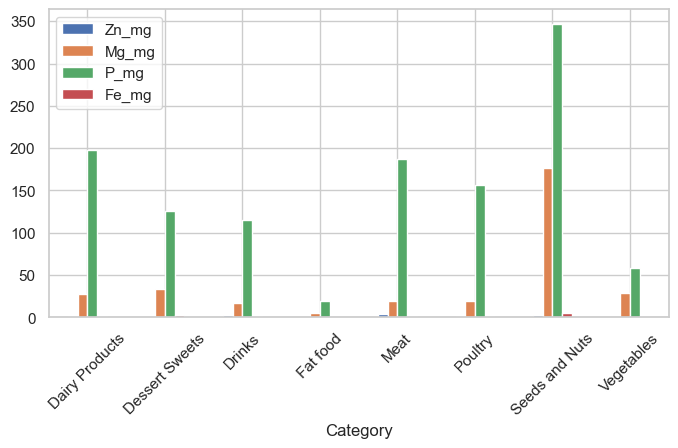

In [36]:
minerals_df = df_nutri[["Category","Zn_mg","Mg_mg","P_mg","Fe_mg"]]

grouped_df = minerals_df.groupby("Category").mean()

grouped_df.plot(kind="bar", figsize=(8,4))
plt.xticks(rotation=45)

plt.show()

This shows thatseeds and nuts are the highest sources of both potassium and magnesium. Meat is also a good source of potassium, but not as high as seeds and nuts. Dairy products, especially milk and cheese, are good sources of Potasssium but not as high in potassium as seeds and nuts

Q Which food categories are the highest sources of Fibre, Omega-3(Fat), Carbohydrate, Protein, Vitamin D, Vaitamin K, Calcium Water and Sugar i.e best nutrient for PCOS patient?

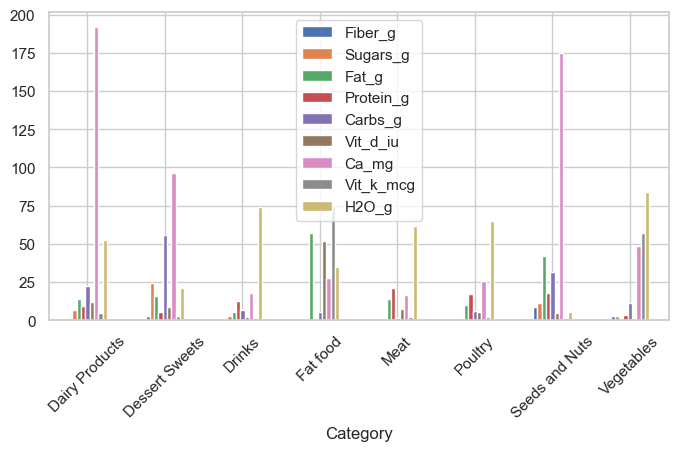

In [37]:
minerals_df = df_nutri[["Category","Fiber_g","Sugars_g","Fat_g","Protein_g","Carbs_g","Vit_d_iu","Ca_mg","Vit_k_mcg","H2O_g"]]

grouped_df = minerals_df.groupby("Category").mean()

grouped_df.plot(kind="bar", figsize=(8,4))
plt.xticks(rotation=45)

plt.show()

Q. what are the top categories from high to low Calories?"

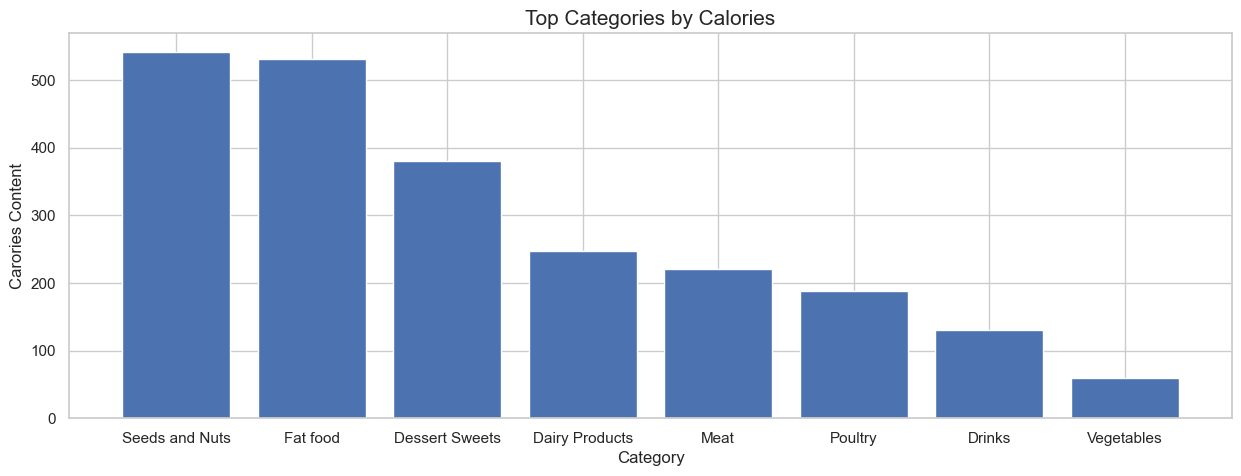

In [38]:
grouped_by = df_nutri.groupby("Category")["calories"].mean()

sorted_series = grouped_by.sort_values(ascending=False)
plt.subplots(figsize = (15,5), dpi = 100)
plt.bar(sorted_series.index,sorted_series.values,)
plt.xlabel("Category")
plt.ylabel("Carories Content")
plt.title("Top Categories by Calories", size=15)

plt.show()

Q: Create a Dataframe Category with most fiber

In [39]:
top_fiber = df_nutri.groupby('Category')['Fiber_g'].mean().nlargest(10)

top_fiber_df = top_fiber.reset_index(name='Mean Fiber (g)').head(10)
top_fiber_df

,Category,Mean Fiber (g)
0,Seeds and Nuts,8.573214
1,Vegetables,2.880709
2,Dessert Sweets,2.502731
3,Dairy Products,1.291602
4,Fat food,0.458571
5,Poultry,0.433536
6,Drinks,0.336755
7,Meat,0.126347


In [40]:
# Convert string cells to integers
le = LabelEncoder()
df_nutri['Food'] = le.fit_transform(df_nutri['Food'])
df_nutri['Category'] = le.fit_transform(df_nutri['Category'])

df_nutri.to_csv('updated_nutri.csv', index=False)

df_nutri.drop_duplicates(inplace=True)

# Clean empty cells
df_nutri.fillna(0, inplace=True)

print(df_nutri)

      Food  Svg_size_g  calories  Vit_a_iu  Vit_b12_mcg  Vit_b6_mg  Vit_c_mg  \
0     2404       100.0      25.0      23.0         0.00      0.084       2.2   
1     1773       100.0      25.0       0.0         0.00      0.184      48.2   
2     3045       100.0     282.0       0.0         2.31      0.130       0.0   
3     1860       100.0     300.0     820.0         1.30      0.227       0.0   
4     1973       100.0     215.0     100.0         0.47      0.010       0.0   
...    ...         ...       ...       ...          ...        ...       ...   
4826   739       100.0     125.0      11.0         1.64      0.631       0.0   
4827  2980       100.0     206.0       0.0         2.95      0.140       0.0   
4828  3063       100.0     277.0       0.0         2.42      0.110       0.0   
4829   761       100.0     121.0       4.0         1.84      0.644       0.0   
4830   762       100.0     121.0       6.0         1.84      0.644       0.0   

      Vit_d_iu  Vit_k_mcg  Vit_e_mg  ..

In [41]:
df_nutri.isnull().sum()

Food              0
Svg_size_g        0
calories          0
Vit_a_iu          0
Vit_b12_mcg       0
Vit_b6_mg         0
Vit_c_mg          0
Vit_d_iu          0
Vit_k_mcg         0
Vit_e_mg          0
B_carotene_mcg    0
B1_mg             0
Cu_mg             0
Fe_mg             0
Mg_mg             0
P_mg              0
K_mg              0
Zn_mg             0
Protein_g         0
Ca_mg             0
Carbs_g           0
Fiber_g           0
Sugars_g          0
Fat_g             0
Ttl_fat_g         0
Chol_mg           0
Na_mg             0
H2O_g             0
Category          0
Mood_Weight       0
dtype: int64

In [42]:
df_nutri.dtypes

Food                int32
Svg_size_g        float64
calories          float64
Vit_a_iu          float64
Vit_b12_mcg       float64
Vit_b6_mg         float64
Vit_c_mg          float64
Vit_d_iu          float64
Vit_k_mcg         float64
Vit_e_mg          float64
B_carotene_mcg    float64
B1_mg             float64
Cu_mg             float64
Fe_mg             float64
Mg_mg             float64
P_mg              float64
K_mg              float64
Zn_mg             float64
Protein_g         float64
Ca_mg             float64
Carbs_g           float64
Fiber_g           float64
Sugars_g          float64
Fat_g             float64
Ttl_fat_g         float64
Chol_mg           float64
Na_mg             float64
H2O_g             float64
Category            int32
Mood_Weight         int64
dtype: object

In [43]:
df_nutri.columns[df_nutri.isna().any()] 

Index([], dtype='object')

In [44]:
df_nutri.drop(columns=['Svg_size_g'])

,Food,calories,Vit_a_iu,Vit_b12_mcg,Vit_b6_mg,Vit_c_mg,Vit_d_iu,Vit_k_mcg,Vit_e_mg,B_carotene_mcg,...,Carbs_g,Fiber_g,Sugars_g,Fat_g,Ttl_fat_g,Chol_mg,Na_mg,H2O_g,Category,Mood_Weight
0,2404,25.0,23.0,0.00,0.084,2.2,0.0,3.5,0.30,14.0,...,5.88,3.0,3.53,0.18,0.2,0.0,2.0,92.30,7,2
1,1773,25.0,0.0,0.00,0.184,48.2,0.0,15.5,0.08,0.0,...,4.97,2.0,1.91,0.28,0.3,0.0,30.0,92.07,7,2
2,3045,282.0,0.0,2.31,0.130,0.0,2.0,3.6,0.20,0.0,...,0.00,0.0,0.00,23.41,23.0,73.0,59.0,59.47,4,3
3,1860,300.0,820.0,1.30,0.227,0.0,18.0,2.0,0.21,12.0,...,0.46,0.0,0.46,24.26,24.0,72.0,842.0,51.80,0,3
4,1973,215.0,100.0,0.47,0.010,0.0,8.0,0.2,0.27,0.0,...,0.20,0.0,0.00,14.60,15.0,84.0,67.0,65.80,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4826,739,125.0,11.0,1.64,0.631,0.0,1.0,1.5,0.23,0.0,...,0.00,0.0,0.00,3.50,3.5,62.0,54.0,72.51,4,3
4827,2980,206.0,0.0,2.95,0.140,0.0,0.0,0.0,0.19,0.0,...,0.00,0.0,0.00,8.86,8.9,109.0,50.0,59.95,4,3
4828,3063,277.0,0.0,2.42,0.110,0.0,0.0,0.0,0.21,0.0,...,0.00,0.0,0.00,22.74,23.0,78.0,39.0,59.80,4,3
4829,761,121.0,4.0,1.84,0.644,0.0,1.0,1.5,0.24,0.0,...,0.00,0.0,0.00,3.04,3.0,60.0,53.0,73.43,4,3


In [45]:
# Clean empty cells
df_nutri.fillna(0, inplace=True)

In [46]:
# Read the dataset
#Updated = pd.read_csv('updated_dt.csv')

In [47]:
df_nutri.corr()

,Food,Svg_size_g,calories,Vit_a_iu,Vit_b12_mcg,Vit_b6_mg,Vit_c_mg,Vit_d_iu,Vit_k_mcg,Vit_e_mg,...,Carbs_g,Fiber_g,Sugars_g,Fat_g,Ttl_fat_g,Chol_mg,Na_mg,H2O_g,Category,Mood_Weight
Food,1.000000,NaN,0.056263,0.019589,-0.091051,-0.104796,-0.019562,0.081739,0.058297,0.077943,...,0.098304,0.102600,0.010767,0.072741,0.073044,-0.049245,0.134070,-0.060850,-0.000919,0.095434
Svg_size_g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
calories,0.056263,NaN,1.000000,-0.067311,-0.026174,0.042685,-0.072026,0.120382,-0.055087,0.313411,...,0.483464,0.271814,0.356713,0.857825,0.857743,0.000001,0.077626,-0.923584,-0.213564,-0.022494
Vit_a_iu,0.019589,NaN,-0.067311,1.000000,0.631150,0.072903,0.049106,0.053175,0.229157,0.080809,...,-0.031185,0.028955,-0.028021,-0.039441,-0.039254,0.116037,-0.008049,0.068469,0.104571,0.021836
Vit_b12_mcg,-0.091051,NaN,-0.026174,0.631150,1.000000,0.236622,-0.003286,0.053439,-0.032995,0.007285,...,-0.128760,-0.091703,-0.092042,-0.020984,-0.020923,0.350120,-0.032573,0.034141,0.079877,0.119476
Vit_b6_mg,-0.104796,NaN,0.042685,0.072903,0.236622,1.000000,0.037781,0.247386,-0.012355,0.243022,...,-0.104486,0.024290,-0.088779,-0.025972,-0.026083,0.109718,-0.034639,-0.076727,0.147947,0.041857
Vit_c_mg,-0.019562,NaN,-0.072026,0.049106,-0.003286,0.037781,1.000000,0.020776,0.068677,0.041202,...,0.059595,0.041781,0.045611,-0.086116,-0.086131,-0.028035,-0.022941,0.044062,0.022154,-0.080090
Vit_d_iu,0.081739,NaN,0.120382,0.053175,0.053439,0.247386,0.020776,1.000000,0.030373,0.199100,...,0.016049,-0.012752,0.061563,0.129185,0.129388,0.006977,0.030290,-0.096893,-0.067922,0.040298
Vit_k_mcg,0.058297,NaN,-0.055087,0.229157,-0.032995,-0.012355,0.068677,0.030373,1.000000,0.115688,...,-0.024674,0.087251,-0.022423,-0.002303,-0.002217,-0.054683,-0.008127,0.071279,0.132862,-0.029858
Vit_e_mg,0.077943,NaN,0.313411,0.080809,0.007285,0.243022,0.041202,0.199100,0.115688,1.000000,...,0.072786,0.217674,0.077270,0.359985,0.360185,-0.050111,0.017668,-0.247063,-0.032817,-0.050057


In [48]:
# Sort the Series in descending order
correlation_with_target = df_nutri.corr()['Category'].abs().sort_values(ascending=False)

print(correlation_with_target)

Category          1.000000
Carbs_g           0.423001
Sugars_g          0.340766
Ca_mg             0.300046
H2O_g             0.294243
Protein_g         0.278409
calories          0.213564
B_carotene_mcg    0.173276
Mood_Weight       0.165784
Chol_mg           0.149965
Vit_b6_mg         0.147947
Zn_mg             0.139715
Vit_k_mcg         0.132862
Vit_a_iu          0.104571
Vit_b12_mcg       0.079877
K_mg              0.069402
Vit_d_iu          0.067922
Fat_g             0.056392
Ttl_fat_g         0.056317
Cu_mg             0.051816
B1_mg             0.048961
Na_mg             0.042285
Fiber_g           0.035589
Fe_mg             0.034152
P_mg              0.032896
Vit_e_mg          0.032817
Vit_c_mg          0.022154
Mg_mg             0.015518
Food              0.000919
Svg_size_g             NaN
Name: Category, dtype: float64


## Inferences and conclusion

The main aim of the project is to analyze the nutritional value of food items across different categories. Through our analysis, we found that the meat category has a high concentration of protein, whereas seeds and nuts are rich in fiber. Categories such as fat foods and desserts are high in calories. Our conclusions are based on analyzing various food categories.

we can conclude that different food categories have different nutrient compositions, and it's important to consider these differences when planning a balanced diet. By identifying the categories that are rich in specific nutrients, we can also make informed choices about the types of food we consume to meet our nutritional needs. Overall, this project provides valuable insights into the nutrient composition of different food categories and can be useful for both individuals and professionals in the food and health industries.

### Prediction using logistic Regression

In [49]:
# Picking the features I want to use to train and test my data so I can save the model
features_selection = df_nutri[['Food', 'Category', 'Mood_Weight']].sort_values(by='Mood_Weight', ascending=False).reset_index(drop=True)
print(features_selection)

      Food  Category  Mood_Weight
0     4076         0            3
1     2475         0            3
2     2988         4            3
3     3335         0            3
4     3961         4            3
...    ...       ...          ...
4826  3550         1            1
4827  2469         1            1
4828  1302         1            1
4829  1401         2            1
4830   762         2            1

[4831 rows x 3 columns]


In [50]:
features_selection.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4831 entries, 0 to 4830
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Food         4831 non-null   int32
 1   Category     4831 non-null   int32
 2   Mood_Weight  4831 non-null   int64
dtypes: int32(2), int64(1)
memory usage: 75.6 KB


In [51]:
# Clean empty cells
features_selection.fillna(0, inplace=True)

In [52]:
X = features_selection.drop(['Category'],axis=1)
y = features_selection['Category']

In [53]:
# Normalize the data
sc = StandardScaler()
X = sc.fit_transform(X)

In [54]:
X_train, x_test, Y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [55]:
logregPCOS = LogisticRegression()
logregPCOS.fit(X_train,Y_train)

LogisticRegression()

In [56]:
y_pred = logregPCOS.predict(x_test)

In [57]:
accuracy = accuracy_score(y_test,y_pred)
conf_matrix = confusion_matrix(y_test,y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.6546018614270941
Confusion Matrix:
[[ 55   0   0   0 109   0   0   0]
 [  0  43  91   0   0   0   0   0]
 [  0  46 150   0   0   0   0   0]
 [  0  11   2   0   0   0   0   0]
 [ 25   0   0   0 258   0   0   0]
 [  0   0   0   0   0 127   0   0]
 [  0   0   0   0   0   9   0   0]
 [  0   0   0   0   0  41   0   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.34      0.45       164
           1       0.43      0.32      0.37       134
           2       0.62      0.77      0.68       196
           3       0.00      0.00      0.00        13
           4       0.70      0.91      0.79       283
           5       0.72      1.00      0.84       127
           6       0.00      0.00      0.00         9
           7       0.00      0.00      0.00        41

    accuracy                           0.65       967
   macro avg       0.39      0.42      0.39       967
weighted avg       0.60      0.65      0.61       967

C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Prediction using Random Forest

In [58]:
print(X_train.shape)

(3864, 2)


In [59]:
def print_scores(n, X_train, Y_train, x_test, y_test):
    train_nut = roc_auc_score(Y_train, n.predict_proba(X_train), multi_class='ovr')
    test_nut = roc_auc_score(y_test, n.predict_proba(x_test), multi_class='ovr')
    print("Training NUT.DATA ", train_nut)
    print("Test NUT.DATA:", test_nut)

In [60]:
# Assuming you have defined x_train, y_train, x_test, and y_test before this point
rf = RandomForestClassifier(n_jobs=-1, n_estimators=150, max_features='sqrt', min_samples_leaf=10)
rf.fit(X_train, Y_train)
print("ROC AUC Scores:")
print_scores(rf, X_train, Y_train, x_test, y_test)

ROC AUC Scores:
Training NUT.DATA  0.9966037822601508
Test NUT.DATA: 0.9890508718154396


In [61]:
y_predrf = rf.predict(x_test)

accuracy = accuracy_score(y_test, y_predrf)
conft_matrix = confusion_matrix(y_test, y_predrf)
classification_rep = classification_report(y_test, y_predrf)

print("Accuracy:", accuracy)
print('\nConfusion Matrix: \n', conft_matrix)
print('\nClassification Report: \n', classification_rep)

Accuracy: 0.9152016546018614

Confusion Matrix: 
 [[154   0   0   0  10   0   0   0]
 [  0 117  17   0   0   0   0   0]
 [  0  14 182   0   0   0   0   0]
 [  0   2   1  10   0   0   0   0]
 [ 23   0   0   0 260   0   0   0]
 [  0   0   0   0   0 122   2   3]
 [  0   0   0   0   0   2   6   1]
 [  0   0   0   0   0   7   0  34]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.94      0.90       164
           1       0.88      0.87      0.88       134
           2       0.91      0.93      0.92       196
           3       1.00      0.77      0.87        13
           4       0.96      0.92      0.94       283
           5       0.93      0.96      0.95       127
           6       0.75      0.67      0.71         9
           7       0.89      0.83      0.86        41

    accuracy                           0.92       967
   macro avg       0.90      0.86      0.88       967
weighted avg       0.92      0.92      0.92    

### Prediction using K_nearest Neighbour (KNN)

In [62]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)
yknn_pred = knn.predict(x_test)

In [63]:
# Making predictions on the test set
accuracy = accuracy_score(y_test, yknn_pred)
print('Accuracy of K-nearest Neighbor classifier on test set:', accuracy)

confusion_matrix = confusion_matrix(y_test, yknn_pred)
print('\nThe confusion Matrix is : \n',confusion_matrix)

print('\nThe evaluation parameters are : \n',classification_report(y_test, yknn_pred))

Accuracy of K-nearest Neighbor classifier on test set: 0.9296794208893485

The confusion Matrix is : 
 [[154   0   0   0  10   0   0   0]
 [  0 121  11   2   0   0   0   0]
 [  0  14 180   2   0   0   0   0]
 [  0   0   1  12   0   0   0   0]
 [ 20   0   0   0 263   0   0   0]
 [  0   0   0   0   0 124   0   3]
 [  0   0   0   0   0   2   7   0]
 [  0   0   0   0   0   3   0  38]]

The evaluation parameters are : 
               precision    recall  f1-score   support

           0       0.89      0.94      0.91       164
           1       0.90      0.90      0.90       134
           2       0.94      0.92      0.93       196
           3       0.75      0.92      0.83        13
           4       0.96      0.93      0.95       283
           5       0.96      0.98      0.97       127
           6       1.00      0.78      0.88         9
           7       0.93      0.93      0.93        41

    accuracy                           0.93       967
   macro avg       0.92      0.91      

In [64]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.


In [65]:
import pickle
# Save the trained model using pickle
nutri_file = 'nutri_model.sav'

In [66]:
scaldnutri_file = 'nutriscalr.pkl'

In [67]:
pickle.dump(rf, open(nutri_file, 'wb'))
pickle.dump(sc, open(scaldnutri_file, 'wb'))

In [68]:
X_m = df_nutri.drop(['Mood_Weight'],axis=1)
y_m = df_nutri['Mood_Weight']

In [69]:
# Normalize the data
sc = StandardScaler()
X = sc.fit_transform(X_m)

In [70]:
X_train, x_test, Y_train,y_test = train_test_split(X,y_m,test_size=0.2,random_state=42)

In [71]:
logregPCOS = LogisticRegression()
logregPCOS.fit(X_train,Y_train)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [72]:
# Now you can use the confusion_matrix function from scikit-learn
from sklearn.metrics import confusion_matrix

y_pred_m = logregPCOS.predict(x_test)
accuracy_mood = accuracy_score(y_test,y_pred_m)
conf_matrix_m = confusion_matrix(y_test,y_pred_m)
classification_rep_m = classification_report(y_test, y_pred_m)

print("Accuracy:", accuracy_mood)
print("Confusion Matrix:")
print(conf_matrix_m)
print("Classification Report:")
print(classification_rep_m)

Accuracy: 0.8169596690796277
Confusion Matrix:
[[224   0 109]
 [  0 222   1]
 [ 67   0 344]]
Classification Report:
              precision    recall  f1-score   support

           1       0.77      0.67      0.72       333
           2       1.00      1.00      1.00       223
           3       0.76      0.84      0.80       411

    accuracy                           0.82       967
   macro avg       0.84      0.84      0.84       967
weighted avg       0.82      0.82      0.82       967



In [73]:
knn_m = KNeighborsClassifier(n_neighbors=3)
knn_m.fit(X_train, Y_train)
yknn_pred_m = knn_m.predict(x_test)
# Making predictions on the test set
accuracy_m = accuracy_score(y_test, yknn_pred_m)
print('Accuracy of K-nearest Neighbor classifier on test set:', accuracy_m)

confusion_matrix_m = confusion_matrix(y_test, yknn_pred_m)
print('\nThe confusion Matrix is : \n',confusion_matrix_m)

print('\nThe evaluation parameters are : \n',classification_report(y_test, yknn_pred_m))

Accuracy of K-nearest Neighbor classifier on test set: 0.9203722854188211

The confusion Matrix is : 
 [[309   2  22]
 [  6 205  12]
 [ 17  18 376]]

The evaluation parameters are : 
               precision    recall  f1-score   support

           1       0.93      0.93      0.93       333
           2       0.91      0.92      0.92       223
           3       0.92      0.91      0.92       411

    accuracy                           0.92       967
   macro avg       0.92      0.92      0.92       967
weighted avg       0.92      0.92      0.92       967



In [74]:
def print_scores(n, X_train, Y_train, x_test, y_test):
    train__m = roc_auc_score(Y_train, n.predict_proba(X_train), multi_class='ovr')
    test__m = roc_auc_score(y_test, n.predict_proba(x_test), multi_class='ovr')
    print("Training NUT.DATA ", train__m)
    print("Test NUT.DATA:", test__m)
# Assuming you have defined x_train, y_train, x_test, and y_test before this point
rf_m = RandomForestClassifier(n_jobs=-1, n_estimators=150, max_features='sqrt', min_samples_leaf=10)
rf_m.fit(X_train, Y_train)
print("ROC AUC Scores:")
print_scores(rf_m, X_train, Y_train, x_test, y_test)
y_predrf_m = rf_m.predict(x_test)

accuracy_m = accuracy_score(y_test, y_predrf_m)
conft_matrix_m = confusion_matrix(y_test, y_predrf_m)
classification_rep_m = classification_report(y_test, y_predrf_m)

print("Accuracy:", accuracy_m)
print('\nConfusion Matrix: \n', conft_matrix_m)
print('\nClassification Report: \n', classification_rep_m)

ROC AUC Scores:
Training NUT.DATA  0.999974330653786
Test NUT.DATA: 0.9997129947905471
Accuracy: 0.9865563598759048

Confusion Matrix: 
 [[330   0   3]
 [  2 221   0]
 [  8   0 403]]

Classification Report: 
               precision    recall  f1-score   support

           1       0.97      0.99      0.98       333
           2       1.00      0.99      1.00       223
           3       0.99      0.98      0.99       411

    accuracy                           0.99       967
   macro avg       0.99      0.99      0.99       967
weighted avg       0.99      0.99      0.99       967



In [75]:
import pickle
# Save the trained model using pickle
# Specify the file paths
mood_file = 'mood_model.sav'
scaldmood_file = 'mood_scaler.pkl'

# Save the model and scalar
with open(mood_file, 'wb') as file:
    pickle.dump(rf_m, file)

with open(scaldmood_file, 'wb') as file:
    pickle.dump(sc, file)